# Project 3 - о вкусной и здоровой пище

## 1. Подготовка к работе

Импортируем необходимые библиотеки и загружаем данные для анализа

In [1175]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
#import re
from datetime import datetime
import warnings
import seaborn as sns
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (15,7)

In [1176]:
df = pd.read_csv('main_task.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Данные грязные, есть пропуски, всего 3 числовых столбца, из который 1 целевой.
Радует, что как раз в целевом столбце нет пропусков.
Сразу можно заменить названия колонок на более удобые и посмотреть на формат данных в таблице

In [1177]:
df.columns = ['id', 'city', 'cuisine', 'ranking', 'rating', 'price_range', 'n_reviews', 'reviews', 'url_ta', 'id_ta']
df.head(10)

,id,city,cuisine,ranking,rating,price_range,n_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,NaN,1419.0,3.0,NaN,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,NaN,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,NaN,2692.0,4.0,NaN,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


## 2. Предобработка данных

### 2.0 Служебные столбцы

Столбцы `url_ta` и `id_ta` являются скорее служебными и бесполезными для анализа. От них можно избавиться, единственное, желательно проверить наличие дубликатов в `id_ta`, вдруг какие-то рестораны попали в данные несколько раз.
Найдем разность между общим количеством значений и количеством уникальных значений

In [1178]:
len(df.id_ta) - df.id_ta.nunique()

20

Целых 20! Посмотрим, что же это за значения такие:

In [1179]:
ta_ids = df.id_ta.value_counts()

def is_not_unique_ta(col):
    return col.apply(lambda x: ta_ids[x] > 1)


non_unique_ta = df[is_not_unique_ta(df.id_ta)]
non_unique_ta.sort_values(by=['id_ta'])

,id,city,cuisine,ranking,rating,price_range,n_reviews,reviews,url_ta,id_ta
38946,id_3242,Madrid,NaN,3244.0,5.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799
13980,id_3239,Madrid,NaN,3241.0,5.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187514-d10047799-Reviews-E...,d10047799
11583,id_3810,Madrid,"['American', 'German', 'European', 'Central Eu...",3812.0,4.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463
4732,id_3804,Madrid,"['American', 'German', 'European', 'Central Eu...",3806.0,4.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463
26551,id_3240,Madrid,NaN,3242.0,4.5,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990
26431,id_3238,Madrid,NaN,3240.0,4.5,NaN,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990
10819,id_2197,Madrid,NaN,2199.0,4.5,NaN,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719
12628,id_2329,Madrid,NaN,2331.0,4.5,NaN,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719
29879,id_3662,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3664.0,4.0,$$ - $$$,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956
16920,id_3536,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3538.0,4.0,$$ - $$$,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956


Дубликатов немного, поэтому можно пробежать глазами и заметить, что это действительно дубликаты по всем столбцам за исключением `ranking`. Отбросим из таблицы те дубликаты, у которых значение `ranking` больше (т.е. хуже)

In [1180]:
# отсортируем наши неуникальные записи сначала по 'id_ta', затем по 'ranking' по убыванию
# и из полученного сета возьмем каждый второй индекс
# это и будет индекс дубликата с наибольшим ranking
items_to_drop = non_unique_ta.sort_values(by=['id_ta', 'ranking'], ascending=False).index[0::2]

In [1181]:
# df.drop(labels=items_to_drop, axis=0, inplace=True)
len(df.id_ta) - df.id_ta.nunique()

20

Больше дубликатов нет. Теперь можно смело избавляться от этих столбцов

In [1182]:
df.drop(columns=['url_ta', 'id_ta'], inplace=True)

### 2.1 Целевой столбец

Это столбец `rating`. Смотрим уникальные значения.

In [1183]:
df.rating.unique()

array([3.5, 4. , 4.5, 5. , 3. , 2.5, 2. , 1. , 1.5])

<AxesSubplot:>

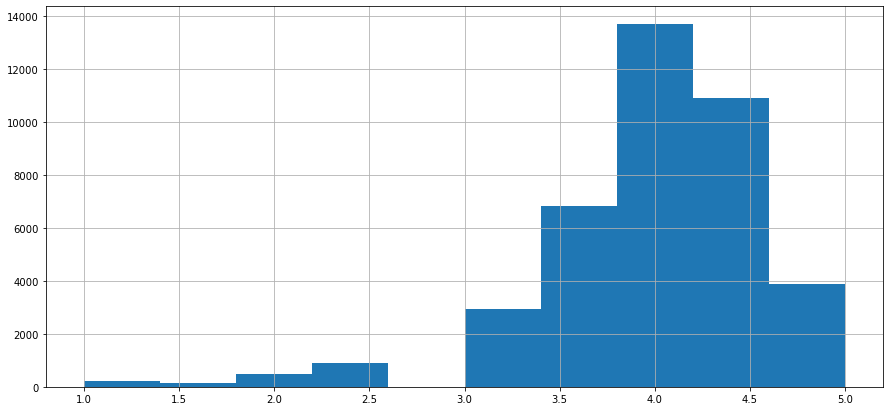

In [1184]:
df.rating.hist()

Распределение адекватное здравому смыслу, выбросов нет. Видно, что все оценки кратны 0.5. Имеет смысл сразу объявить метод, который будет округлять предсказанные оценки на выходе модели, чтобы снизить MAE.

In [1185]:
def round_pred(y_pred):
    return [(round(y / 0.5) * 0.5) for y in y_pred]

### 2.2 Строковые столбцы, приводимые к числовым

Столбец `id` по сути числовой, если избавиться от `id_`. Так и сделаем.

In [1186]:
df.id = df.id.apply(lambda x: int(x[3:]))

Проверим уникальность записей в столбце `id`. В описании предполагается, что под `id` могут скрываться сети ресторанов, значит, могут присутствовать неуникальные значения.

In [1187]:
all_ids = df.id.value_counts()
print('всего ресторанных сетей:', len(all_ids[all_ids > 1]))

всего ресторанных сетей: 7204


Text(0.5, 0, 'Count of restorants in net')

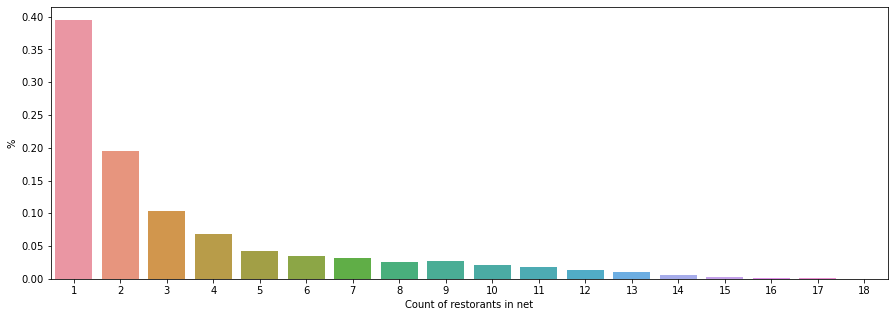

In [1188]:
# построим распределения количества ресторанов в сетях
# где по оси х будет количество ресторанов в сети
# а по оси у будет % сетей с таким количеством ресторанов
all_ids_dist = all_ids.value_counts() / len(all_ids);
plt.figure(figsize=(15, 5))         
sns.barplot(y=all_ids_dist, x=all_ids_dist.index)
plt.ylabel('%')
plt.xlabel('Count of restorants in net')

Около 40% ресторанов НЕ сетевые. Но и сетевых очень много.

Рассмотрим `price_range`. При первичном анализе мы видели пропуски в этом столбце. Их необходимо заполнить, но сначала надо понять, какие значения этот столбец может принимать

In [1189]:
df.price_range.unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

Значений немного, примем `$` за 1, `$$ - $$$` за 2, `$$$$` за 3. 

In [1190]:
df.price_range = df.price_range.apply(lambda x: 1 if x == '$' else (2 if x == '$$ - $$$' else (3 if x == '$$$$' else x)))
df.price_range.isna().sum()

13886

Пропусков очень много. По идее пропуски можно считать как средний бюджет, но можно поступить хитрее и для пропусков в сетевых ресторанах посчитать среднюю цену, если она известна. Если нет, то `2` без вариантов

In [1191]:
price_by_id = df.groupby(by='id').price_range.mean()
price_by_city = df.groupby(by='city').price_range.mean()
num_found1 = 0
num_found2 = 0

# get a row and return supposed price range
def fill_price(row):
    global num_found1, num_found2

    if not math.isnan(row.price_range):     # if current price range is finite
        return row.price_range              # leave it unchanged

    price0 = price_by_id[row.id]            # otherwise - find average price from restorant net by 'id'
    if not math.isnan(price0):              # if finite 
        num_found1 += 1                     # remember how many finite values were found by id
        return round(price0)                # and return found value

    price0 = price_by_city[row.city]        # otherwise - find average price from restorant net by 'id'
    if not math.isnan(price0):              # if finite 
        num_found2 += 1                     # remember how many finite values were found by city
        return round(price0)                # and return found value

    return 2                                # if other values are NaN - just return 2 as 'average price range'


df.price_range = df.apply(fill_price, axis=1)
num_found1, num_found2

(10085, 3801)

Сразу заполним нулями пропуски в столбце `n_reviews`.

In [1192]:
df.n_reviews.fillna(0, inplace=True)

Глянем на распределение

<AxesSubplot:>

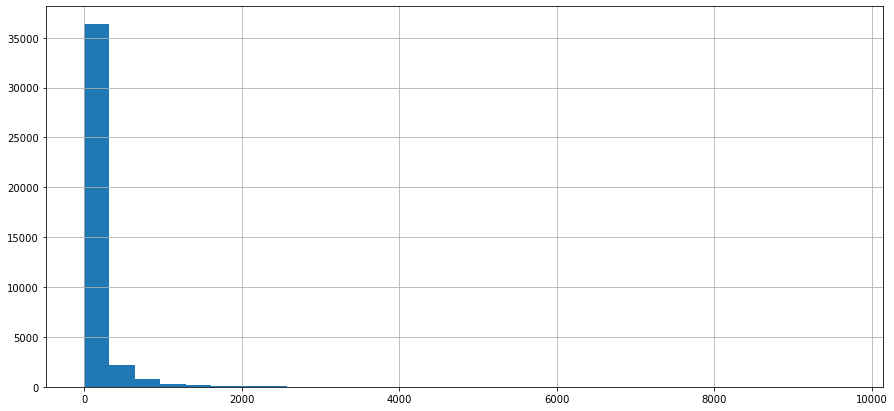

In [1193]:
df.n_reviews.hist(bins=30)

In [1194]:
bins = list(range(-100, 1001, 100))
bins.extend(range(2000, 10001, 1000))
df.n_reviews.value_counts(bins=bins, sort=False)

(-100.001, 0.0]       2543
(0.0, 100.0]         27180
(100.0, 200.0]        4348
(200.0, 300.0]        1961
(300.0, 400.0]        1162
(400.0, 500.0]         708
(500.0, 600.0]         490
(600.0, 700.0]         327
(700.0, 800.0]         264
(800.0, 900.0]         215
(900.0, 1000.0]        129
(1000.0, 2000.0]       533
(2000.0, 3000.0]        85
(3000.0, 4000.0]        30
(4000.0, 5000.0]        14
(5000.0, 6000.0]         3
(6000.0, 7000.0]         4
(7000.0, 8000.0]         2
(8000.0, 9000.0]         1
(9000.0, 10000.0]        1
Name: n_reviews, dtype: int64

Выглядит как экспоненциальное распределение, что логично для такого типа данных. Отрицательных значений нет.
Сделаем то же самое для столбца `ranking`

<AxesSubplot:>

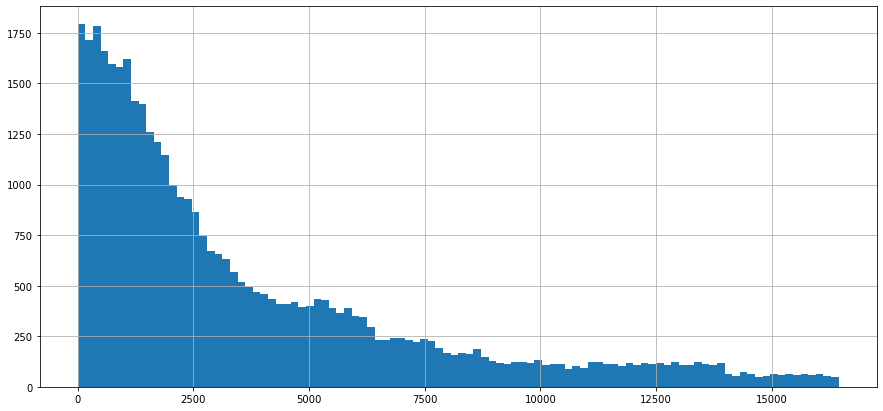

In [1195]:
df.ranking.hist(bins=100)

Тоже экспоненциальное распределение, без отрицательных (ошибочных) значений и явных выбросов. Однако это вроде как место ресторана в своем городе. что если построить распределение в самом крупном из городов?

<AxesSubplot:>

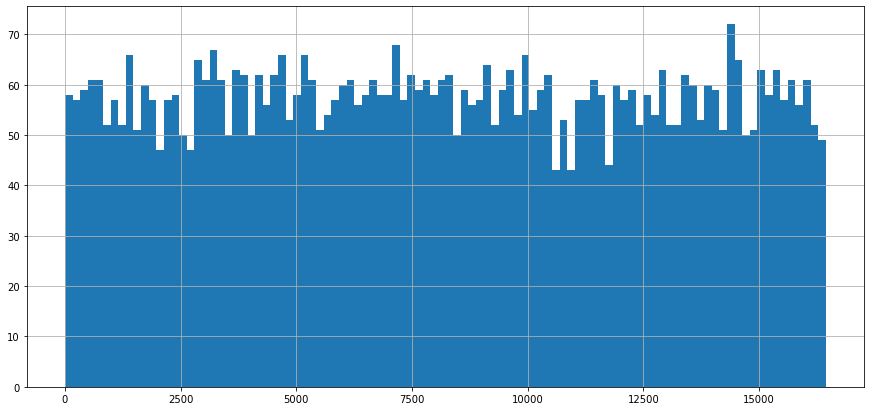

In [1196]:
top_city = df.city.value_counts().index[0]
df.ranking[df.city == top_city].hist(bins=100)

Ой, а оно равномерное. А в топ-10 городов?

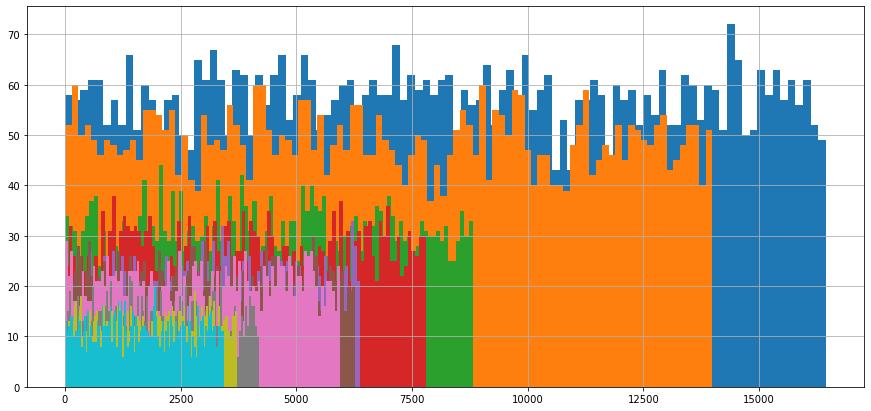

In [1197]:
for x in (df.city.value_counts())[0:10].index:
    df.ranking[df.city == x].hist(bins=100)
plt.show()

А оно везде равномерное, что логично для распределения мест. Экспоненциальное распределение `ranking` получилось за счет того, что равномерное распределение в каждом из городов наложилось на экспоненциальное распределение ресторанов по городам (как будет показано ниже). Учтем этот факт при формировании новых признаков.

### 2.4 Прочие столбцы

Рассмотрим столбец `city`

Text(0.5, 0, 'City')

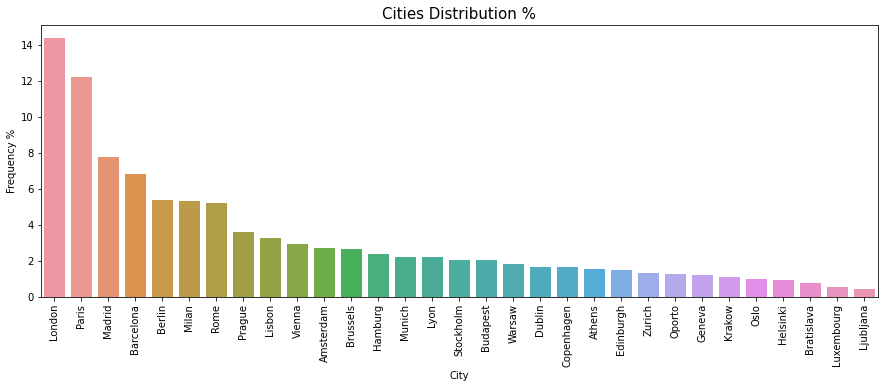

In [1198]:
all_cities = df.city.value_counts()         # количество упоминаний каждого города
n_cities = len(df.city)                     # общее количество городов 
all_cities_pc = 100 * all_cities / n_cities # % каждого города от общего количества
# построим график распределения городов 
plt.figure(figsize=(15, 5))         
sns.barplot(x=all_cities.index, y=all_cities_pc)
plt.title('Cities Distribution %', fontsize=15)
plt.ylabel('Frequency %')
plt.xticks(rotation=90)
plt.xlabel('City')

In [1199]:
len(all_cities)

31

Всего 31 город, распределение неравномерное. Столбец `city` разумно в последствии преобразовать в dummy-переменные, для чего было бы разумно уменьшить размерность данных, заменив редкие города на `Other`.
Каков процент городов занимают менее 1% в списке? А менее 2%?

In [1200]:
def city_by_percent(p):
    n1 = len(all_cities_pc[all_cities_pc < p])    # количество городов с частотой менее p%
    n2 = sum(all_cities_pc[all_cities_pc < p])    # общий %% городов с частотой менее p%
    print('менее ', p, '%: ', n1, '; в сумме: ', n2, '%', sep='')


city_by_percent(1)
city_by_percent(2)

менее 1%: 5; в сумме: 3.6374999999999997%
менее 2%: 14; в сумме: 16.7825%


На мой взгляд, в данном случае допустимо пожертвовать городами с частотой менее 1%

Теперь столбец `cuisine`.

In [1201]:
df.cuisine[0], type(df.cuisine[0])

("['European', 'French', 'International']", str)

Тип данных - строка, в которой заключен список. Необходимо парсить.

In [1202]:
def parse_cuisine(x):
    if pd.isna(x):                  # пустые значения первращаем в пустые массивы
        return [];

    arr = str(x)[1:-1].split(', '); # убираем скобки и разбиваем на строки
    return [s[1:-1] for s in arr]   # убираем из строк кавычки


df.cuisine = df.cuisine.apply(parse_cuisine)
df.cuisine.head()

0                    [European, French, International]
1                                                   []
2    [Japanese, Sushi, Asian, Grill, Vegetarian Fri...
3                                                   []
4      [German, Central European, Vegetarian Friendly]
Name: cuisine, dtype: object

Теперь рассмотрим насколько часто можно встретить ту или иную кухню. Для этого построим распределение % кухонь от их общего числа. 

Text(0.5, 0, 'Cuisine')

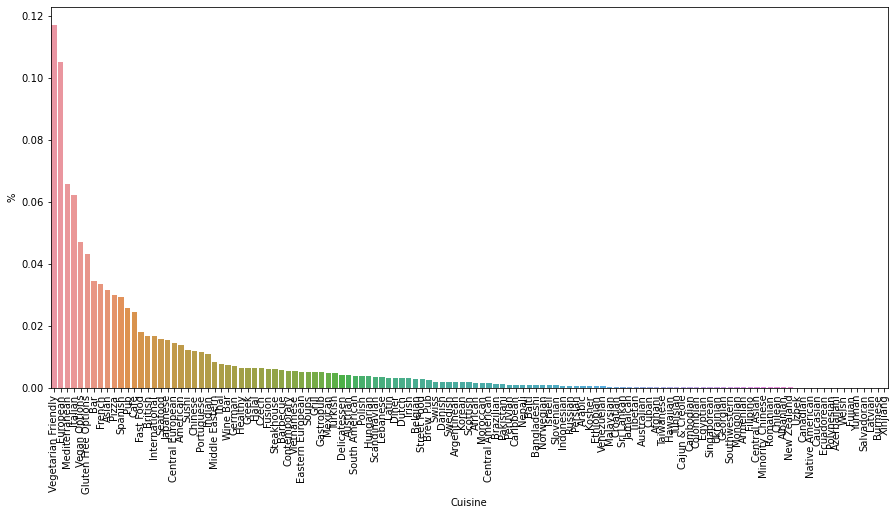

In [1203]:
cuisine_all = df.cuisine.explode().value_counts()             # expand arrays into one big Series and apply 'value_counts' to it
cuisine_cnt = cuisine_all.sum()                               # compute total cuisine count
cuisine_all = cuisine_all.apply(lambda x: x / cuisine_cnt)    # compute % frequency of each cuisine
# построим распределения количества ресторанов в сетях
# где по оси х будет количество ресторанов в сети
# а по оси у будет % сетей с таким количеством ресторанов
sns.barplot(y=cuisine_all, x=cuisine_all.index)
plt.xticks(rotation=90)
plt.ylabel('%')
plt.xlabel('Cuisine')

Опять экспоненциальное распределение, но снова чуется обман. Как распределены кухни в самом популярном городе?

Text(0.5, 0, 'Cuisine')

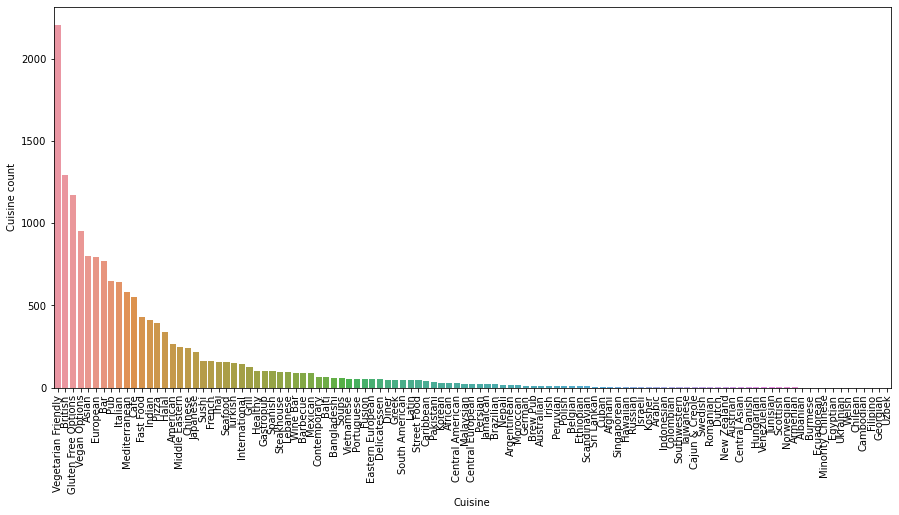

In [1204]:
cuisine_by_city = df[['city', 'cuisine']].explode(column='cuisine')             # get all cuisines for all cities
cuisine_top_city = cuisine_by_city.cuisine[cuisine_by_city.city == top_city]    # get cuisines for top-1 city
sns.countplot(cuisine_top_city, order=cuisine_top_city.value_counts().index)    # plot their distribution
plt.xticks(rotation=90)
plt.ylabel('Cuisine count')
plt.xlabel('Cuisine')

Ок, честное экспоненциальное распределение. Вопросов больше нет.

## 3. Feature engeneering

Столбец `id` - это код ресторана или сети. Добавим столбец, указывающий на то, что ресторан сетевой. Значение столбца должно быть тем больше, чем больше ресторанов в этой сети, однако, распределение имеет экспоненциальный вид, поэтому разумнее брать не просто количество ресторанов в сети, а его логарифм

In [1205]:
df['is_net'] = df.id.apply(lambda x: math.log(all_ids[x]))

Теперь добавим дополнительную информацию по кухням: популярность кухонь - сумму % частоты каждой кухни из предлагаемых рестораном. 
Можно добавить также количество предлагаемых кухонь, но оно не имеет значимого влияния на МАЕ.

In [1206]:
def cuisine_rating(x):
    return sum([cuisine_all[c] for c in x])

df['cuisine_rating'] = df.cuisine.apply(cuisine_rating)

Преобразуем `ranking` в % от общего числа мест в каждом городе, чтобы он зависил только от опций ресторана, а не от популярности города.

In [1207]:
def normalize_ranking(row):
    return row.ranking / all_cities[row.city]


df.ranking = df.apply(normalize_ranking, axis=1)

Превратим столбец `reviews` из каши в разницу (в днях) между датами самого старого и самого нового обзоров

In [1208]:
df.head()

,id,city,cuisine,ranking,rating,price_range,n_reviews,reviews,is_net,cuisine_rating
0,5569,Paris,"[European, French, International]",1.137431,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",1.098612,0.155146
1,1535,Stockholm,[],1.874390,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",2.302585,0.000000
2,352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",0.061317,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",2.079442,0.270978
3,3456,Berlin,[],1.604640,5.0,2.0,3.0,"[[], []]",1.386294,0.000000
4,615,Munich,"[German, Central European, Vegetarian Friendly]",0.695409,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",2.639057,0.138517


In [1209]:
# gets a string and return list of two dates: 
# the earliest review date and the latest one
def parse_review_date(x):
    arr = str(x)[2:-2].split('], [') # split into arrays [reviews, dates]
    if (arr[1] == ''):               
        return []

    res = pd.to_datetime(arr[1].split(', '), format='\'%m/%d/%Y\'') # parse datetime using known format
    return [res.min(), res.max()]


now = datetime.now()
df['review_dates'] = df.reviews.apply(parse_review_date)
# get duration (in days) between the earliest and the latest reviews
df['review_dist'] = df.review_dates.apply(lambda x: (x[1] - x[0]).days if len(x) == 2 else 0)
# get duration (in days) since the latest erview till now
df['review_age'] = df.review_dates.apply(lambda x: (now - x[1]).days if len(x) == 2 else 0)
df.head()


,id,city,cuisine,ranking,rating,price_range,n_reviews,reviews,is_net,cuisine_rating,review_dates,review_dist,review_age
0,5569,Paris,"[European, French, International]",1.137431,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",1.098612,0.155146,"[2017-11-20 00:00:00, 2017-12-31 00:00:00]",41,1187
1,1535,Stockholm,[],1.874390,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",2.302585,0.000000,"[2016-06-19 00:00:00, 2017-07-06 00:00:00]",382,1365
2,352,London,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",0.061317,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",2.079442,0.270978,"[2018-01-06 00:00:00, 2018-01-08 00:00:00]",2,1179
3,3456,Berlin,[],1.604640,5.0,2.0,3.0,"[[], []]",1.386294,0.000000,[],0,0
4,615,Munich,"[German, Central European, Vegetarian Friendly]",0.695409,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",2.639057,0.138517,"[2017-02-19 00:00:00, 2017-11-18 00:00:00]",272,1230


In [1210]:
capitals = [
    'London', 'Paris', 'Madrid', 'Berlin', 'Rome', 'Prague', 'Lisbon', 'Amsterdam',
    'Brussels', 'Stockholm', 'Budapest', 'Warsaw', 'Copenhagen', 'Athens', 'Zurich', 
    'Oslo', 'Helsinki', 'Bratislava', 'Luxembourg'
]
capitals_map = dict([(x, int(x in capitals)) for x in all_cities.index])
df['is_capital'] = df.city.apply(lambda x: capitals_map[x])

In [1211]:
df.drop(columns='id').corr(method='pearson')

,ranking,rating,price_range,n_reviews,is_net,cuisine_rating,review_dist,review_age,is_capital
ranking,1.000000,-0.542702,-0.086988,-0.406344,-0.517322,-0.576431,0.106742,-0.057975,-0.004080
rating,-0.542702,1.000000,-0.019579,0.026924,0.304230,0.117018,-0.065990,-0.024088,0.003156
price_range,-0.086988,-0.019579,1.000000,0.124168,0.046628,0.089566,-0.030547,-0.030535,0.012791
n_reviews,-0.406344,0.026924,0.124168,1.000000,0.228531,0.426895,-0.086586,0.032421,0.002394
is_net,-0.517322,0.304230,0.046628,0.228531,1.000000,0.354953,-0.054026,0.030255,-0.232724
cuisine_rating,-0.576431,0.117018,0.089566,0.426895,0.354953,1.000000,-0.108442,0.083211,-0.003329
review_dist,0.106742,-0.065990,-0.030547,-0.086586,-0.054026,-0.108442,1.000000,0.230754,0.000125
review_age,-0.057975,-0.024088,-0.030535,0.032421,0.030255,0.083211,0.230754,1.000000,0.061525
is_capital,-0.004080,0.003156,0.012791,0.002394,-0.232724,-0.003329,0.000125,0.061525,1.000000


Теперь превратим столбец `city` в dummy-переменные, предварительно уменьшив размерность данных, заменив города с весом меньше 1% на `Other`

In [1212]:
df.city = df.city.apply(lambda x: x if all_cities_pc[x] > 1 else 'Other')
df = pd.get_dummies(df, columns=['city'], prefix='city')
df.head()

,id,cuisine,ranking,rating,price_range,n_reviews,reviews,is_net,cuisine_rating,review_dates,...,city_Munich,city_Oporto,city_Other,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich
0,5569,"[European, French, International]",1.137431,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",1.098612,0.155146,"[2017-11-20 00:00:00, 2017-12-31 00:00:00]",...,0,0,0,1,0,0,0,0,0,0
1,1535,[],1.874390,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",2.302585,0.000000,"[2016-06-19 00:00:00, 2017-07-06 00:00:00]",...,0,0,0,0,0,0,1,0,0,0
2,352,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",0.061317,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",2.079442,0.270978,"[2018-01-06 00:00:00, 2018-01-08 00:00:00]",...,0,0,0,0,0,0,0,0,0,0
3,3456,[],1.604640,5.0,2.0,3.0,"[[], []]",1.386294,0.000000,[],...,0,0,0,0,0,0,0,0,0,0
4,615,"[German, Central European, Vegetarian Friendly]",0.695409,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",2.639057,0.138517,"[2017-02-19 00:00:00, 2017-11-18 00:00:00]",...,1,0,0,0,0,0,0,0,0,0


## 4. Моделирование

In [1213]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(columns=['id', 'cuisine', 'reviews', 'rating', 'review_dates'])
y = df['rating']

In [1214]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [1215]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73)

In [1216]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1217]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, random_state=73)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [1218]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2116185


In [1219]:
y_pred_rnd = round_pred(y_pred)

In [1220]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rnd))

MAE: 0.17995
